# Fig 6 plotting

Plots data associated with figure 6.

### Standard Imports

In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib as mpl
from cycler import cycler
import pylab
from matplotlib.colors import LogNorm, Normalize

# Plotting parameters
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.0, 'lines.markersize': 5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
mpl.rc('axes', prop_cycle=(cycler('color', ['r', 'k', 'b','g','y','m','c']) ))
mpl.rc('text', usetex=False)
tw = 1.5
sns.set_style({"xtick.major.size": 12, "ytick.major.size": 12,
               "xtick.minor.size": 8, "ytick.minor.size": 8,
               'axes.labelsize': 48,
               'xtick.major.width': tw, 'xtick.minor.width': tw,
               'ytick.major.width': tw, 'ytick.minor.width': tw})
mpl.rc('xtick', labelsize=24) 
mpl.rc('ytick', labelsize=24)
mpl.rc('axes', linewidth=1.75)
plt.gcf().subplots_adjust(bottom=0.15)
sns.set_style({'axes.labelsize': 48, 'axes.titlesize': 48})
cm = 1/2.54


# Color variables
cb_green = (102/255, 194/255, 165/255, 0.5)
cb_orange = (252/255, 141/255, 98/255, 0.5)
cb_blue = (141/255, 160/255, 203/255, 0.5)
cb_darkblue = (141/255, 160/255, 203/255, 0.25)
alpha_grey = (215/255, 215/255, 215/255, 1.0)
alpha_val = 0.5
alpha_red = (alpha_val + 1/2, alpha_val, alpha_val)
alpha_black = (alpha_val, alpha_val, alpha_val)
alpha_blue = (alpha_val, alpha_val, alpha_val + 1/2)

%matplotlib inline

### Import data

In [31]:
df = pd.read_excel('./data/CFU_counts.xlsx', sheet_name='Fig 6b')
df_t = pd.read_excel('./data/CFU_counts.xlsx', sheet_name='Fig 6c')
df_pcr = pd.read_excel('./data/relay_PCR_results.xlsx')

### Plot endpoint CFUs

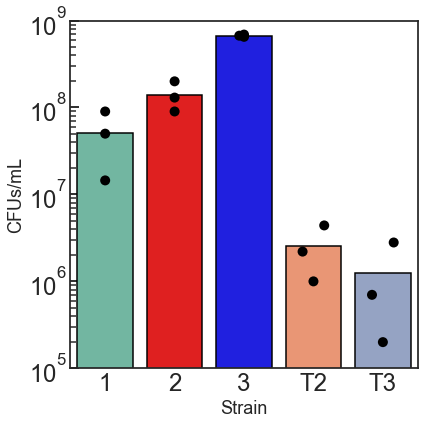

In [8]:
fig = plt.figure(figsize=(6,6))
sns.barplot(data=df, x='Strain', y='CFUs/mL', alpha=1, ci=None, order=[1,2,3,'T2','T3'],
             palette=[cb_green,'red','blue',cb_orange,cb_blue],
           edgecolor='k')
sns.swarmplot(data=df, x='Strain', y='CFUs/mL', order=[1,2,3,'T2','T3'], color='k', s=10)
plt.gca().set_yscale('log')
plt.gca().set_ylim((1e5,1e9))
plt.tight_layout()
plt.savefig('./figs/Fig_6B.pdf')
plt.show()

### Calculate fold difference of Strain 3 and Strain 2

In [22]:
gm_3 = stats.mstats.gmean(df[df.Strain==3]['CFUs/mL'].values)
gm_2 = stats.mstats.gmean(df[df.Strain==2]['CFUs/mL'].values)

print(f'Strain 3 is {gm_3/gm_2}-fold denser than Strain 2')

Strain 3 is 5.045146684019802-fold denser than Strain 2


In [23]:
gm_t3 = stats.mstats.gmean(df[df.Strain=='T3']['CFUs/mL'].values)
gm_t2 = stats.mstats.gmean(df[df.Strain=='T2']['CFUs/mL'].values)

print(f'Strain T2 is {gm_t2/gm_t3}-fold denser than Strain T3')

Strain T2 is 2.9120339244897915-fold denser than Strain T3


### Calculate endpoint transfer rates

In [14]:
rate_df = pd.DataFrame(columns=['Replicate',
                                'Transfer',
                                'Transfer Rate',
                                'Geomean Transfer Rate',
                               ])
reps = [1,2,3]
transfers = ['First','Second']
senders = [1,'T2']
receivers = [2,3]
transconjugants = ['T2','T3']

for t in range(2):
    slabel = senders[t]
    rlabel = receivers[t]
    tlabel = transconjugants[t]
    
    rates = np.empty(len(reps))
    for r in range(len(reps)):
        rep = reps[r]
        
        Sval = df[(df['Replicate']==rep) &
                  (df['Strain']==slabel)]['CFUs/mL'].values
        Rval = df[(df['Replicate']==rep) &
                  (df['Strain']==rlabel)]['CFUs/mL'].values
        Tval = df[(df['Replicate']==rep) &
                  (df['Strain']==tlabel)]['CFUs/mL'].values
        
        assert len(Sval)==1
        assert len(Rval)==1
        assert len(Tval)==1
        
        Sval = Sval[0]
        Rval = Rval[0]
        Tval = Tval[0]
        
        rate = Tval/(Sval*Rval)
        
        rates[r] = rate
            
        if r != len(reps)-1:
            tempdict = pd.DataFrame({'Replicate': rep,
                        'Transfer': transfers[t],
                        'Transfer Rate': rate},
                                    index=[0])

            rate_df = pd.concat([rate_df, tempdict], ignore_index=True)

        else:
            tempdict = pd.DataFrame({'Replicate': rep,
                        'Transfer': transfers[t],
                        'Transfer Rate': rate,
                        'Geomean Transfer Rate': stats.mstats.gmean(rates)},
                                    index=[0])

            rate_df = pd.concat([rate_df, tempdict], ignore_index=True)

        

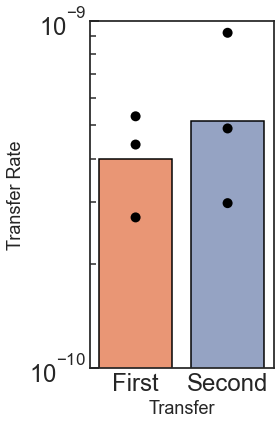

In [21]:
fig = plt.figure(figsize=(4,6))
sns.barplot(data=rate_df, x='Transfer', y='Geomean Transfer Rate', alpha=None,
            palette=[cb_orange,cb_blue],ci=None, edgecolor='k',
            order=['First', 'Second'])
sns.swarmplot(data=rate_df, x='Transfer', y='Transfer Rate', alpha=None,
            palette=['k'], edgecolor='k', s=10,
            order=['First', 'Second'])

plt.gca().set_yscale('log')
plt.gca().set_ylim((1e-10,1e-9))
plt.tight_layout()
plt.savefig('./figs/Fig_6E.pdf')
plt.show()

### Plot timecourse data

In [25]:
df_t

,Replicate,Cin (uM),Sal (uM),Strain,Time (hr),Colonies,Dilution,CFUs/mL
0,3,1,100,1,0,4,100000,400000
1,3,1,100,1,1,6,100000,600000
2,3,1,100,1,2,11,100000,1100000
3,3,1,100,1,3,36,100000,3600000
4,3,1,100,1,4,6,100000,600000
5,3,1,100,1,5,218,100000,21800000
6,3,1,100,1,6,5,10000000,50000000
7,3,1,100,1,7,2,10000000,20000000
8,3,1,100,2,0,1,100000,100000
9,3,1,100,2,1,3,100000,300000


/Users/john/opt/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


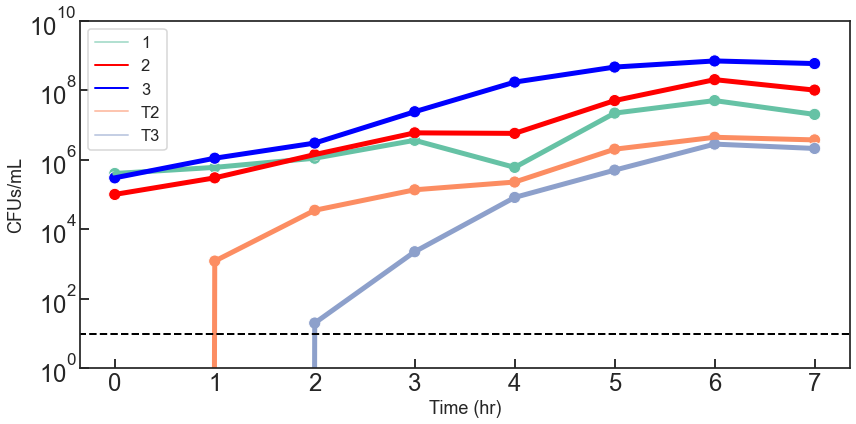

In [30]:
fig = plt.figure(figsize=(12,6))
sns.lineplot(data=df_t, x='Time (hr)', y='CFUs/mL',
             hue='Strain', linewidth=5,
             hue_order = [1,2,3,'T2','T3'],
             palette=[cb_green,'red','blue',cb_orange,cb_blue],
             alpha=1,
            )
sns.scatterplot(data=df_t, x='Time (hr)', y='CFUs/mL',
                hue='Strain', s=150,
             legend=None,
             hue_order = [1,2,3,'T2','T3'],
                palette=[cb_green,'red','blue',cb_orange,cb_blue],
                alpha=1,
               )
plt.gca().set_yscale('log')
plt.gca().set_ylim((1e0,1e10))

xmin, xmax = plt.gca().get_xlim()
plt.plot([-1,8],[10,10], 'k--')
plt.gca().set_xlim((xmin, xmax))

plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('./figs/Fig_6C.pdf')

plt.show()

## Plot out PCR assay results

In [35]:
df_pcr

,Strain,No. Colonies PCR'd,No. None,No. B only,No. A only,No. A and B,Frac. None,Frac. B only,Frac. A only,Frac. A and B,Expec. None,Expec. B only,Expec. A only,Expec. A and B
0,1,21,0,0,20,1,0.000000,0.000000,0.952381,0.047619,0,0,1,0
1,T2,21,1,19,0,1,0.047619,0.904762,0.000000,0.047619,0,1,0,0
2,T3,21,4,17,0,0,0.190476,0.809524,0.000000,0.000000,0,1,0,0
3,3,21,21,0,0,0,1.000000,0.000000,0.000000,0.000000,1,0,0,0


In [36]:
df_pcr_data = df_pcr.loc[:, 'Frac. None':'Frac. A and B']
df_pcr_data

,Frac. None,Frac. B only,Frac. A only,Frac. A and B
0,0.000000,0.000000,0.952381,0.047619
1,0.047619,0.904762,0.000000,0.047619
2,0.190476,0.809524,0.000000,0.000000
3,1.000000,0.000000,0.000000,0.000000


In [37]:
df_pcr_expect = df_pcr.loc[:, 'Expec. None':'Expec. A and B']
df_pcr_expect

,Expec. None,Expec. B only,Expec. A only,Expec. A and B
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0


In [38]:
df_pcr_numbers = df_pcr.loc[:, 'No. None':'No. A and B']
df_pcr_numbers

,No. None,No. B only,No. A only,No. A and B
0,0,0,20,1
1,1,19,0,1
2,4,17,0,0
3,21,0,0,0


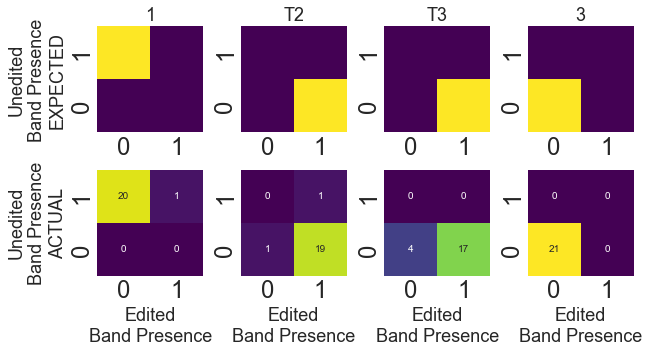

In [42]:
strain_ls = df_pcr['Strain'].values

fig, ax = plt.subplots(2,4, figsize=(9, 5))
for s in range(len(strain_ls)):
    s_data = df_pcr_data.iloc[s].values
    s_expect = df_pcr_expect.iloc[s].values
    s_numbers = df_pcr_numbers.iloc[s].values
    
    s_data = np.reshape(s_data, (2,2))
    s_expect = np.reshape(s_expect, (2,2))
    s_numbers = np.reshape(s_numbers, (2,2))
    
    plt.sca(ax[0,s])
    sns.heatmap(s_expect, cmap='viridis', cbar=None)
    plt.sca(ax[1,s])
    sns.heatmap(s_data, cmap='viridis', cbar=None,
                vmin=0,
                vmax=1,
                annot=s_numbers)
    
    ax[0, s].set_title(strain_ls[s])
    ax[1, s].set_xlabel('Edited\nBand Presence')
    
    ax[0,s].invert_yaxis()
    ax[1,s].invert_yaxis()
    
ax[0,0].set_ylabel('Unedited\nBand Presence\nEXPECTED')
ax[1,0].set_ylabel('Unedited\nBand Presence\nACTUAL')

plt.tight_layout()
plt.savefig('./figs/Fig_6D.pdf')

plt.show()